<font size="6"> **South African Language Identification Hack**</font>

by Njabulo Mkhwanazi


<br />

<center> <img src="https://yt3.ggpht.com/PsUoiWsnbzjuduz7aYaXFfZESHM9P-ohXVQyQpc8ZCiFm_JkqbWA5hlh82MQBzNWnUN2cyivTQ=s900-c-k-c0x00ffffff-no-rj" width=400 height=400 />

<br />

# **Import Libraries**

In [1]:
import nltk  # Natural Language Toolkit library for building Python programs to work with human language data.

import numpy as np # library for numerical algebra 
import pandas as pd # library for working with DataFrames 
import matplotlib.pyplot as plt # library useful for visuals or plotting
from matplotlib.colors import ListedColormap
import seaborn as sns 
import string
import re

import nltk
import pickle
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from wordcloud import WordCloud, ImageColorGenerator


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, log_loss
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# set plot style
sns.set()

Downloading NLTK Corpora

In [2]:
#you can download it directly, i.e.
nltk.download(['punkt','stopwords'])
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

If the download was successful, then the import below should work:

In [3]:
from nltk.corpus import stopwords

In [4]:
# Let's take a look at what we've just downloaded
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# **Introduction**

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society. The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

From [South African Government](https://www.gov.za/about-sa/south-africas-people) 

<br />

<center> <img src="https://i.pinimg.com/originals/04/9c/73/049c73033e30e6e2d82e0c33a867046c.jpg" width=500 height=300 />

<br />



# **Data Collection**

The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data. 

In [5]:
# Loading the train dataset
train_df = pd.read_csv('https://raw.githubusercontent.com/njabulomkhwanazi52/Njabulo_classification_exam/main/train_set.csv')

# Loading the test dataset
test_df = pd.read_csv('https://raw.githubusercontent.com/njabulomkhwanazi52/Njabulo_classification_exam/main/test_set.csv')

# **The dataset information**

**Language IDs**


*   afr &rarr; Afrikaans
*   eng &rarr; English
*   nbl &rarr; isiNdebele
*   nso &rarr; Sepedi
*   sot &rarr; Sesotho
*   ssw &rarr; siSwati 
*   tsn &rarr; Setswana
*   tso &rarr; Xitsonga
*   ven &rarr; Tshivenda    
*   xho &rarr; isiXhosa   
*   zul &rarr; isiZulu    
    
        

# **Natural Language Processing (NLP)**

NLP is a field that focuses on making natural human language usable by computer programs. NLTK, or Natural Language Toolkit, is a Python package that you can use for [NLP](https://realpython.com/nltk-nlp-python/). This step is vital because helps data scientists turn unstructured text into usable data and insights.

In [6]:
# Have a look at train dataset using head() method
train_df.head()


lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...

Let’s see if there are any null values present in train dataset:

In [7]:
train_df.isnull().sum()


lang_id    0
text       0
dtype: int64

Print a list of all the unique languages which are present in this train_df dataset.

In [8]:
lang_id_labels = list(train_df['lang_id'].unique())
print(lang_id_labels)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


Let's have a look at how many data samples we have for each of the different train_df languages.

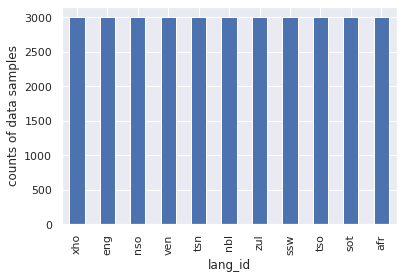

In [9]:
train_df['lang_id'].value_counts().plot(kind = 'bar')
plt.xlabel('lang_id')
plt.ylabel('counts of data samples')
plt.show()

Count of each Target value (language class)

In [10]:
train_df["lang_id"].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In what we have done above, it is nice to see that in our dataset there is no class imbalance.

Let us explore how many rows do we have in our dataset

In [11]:
train_df.shape

(33000, 2)

#### **Text data cleaning**

Text cleaning is the process of preparing raw text for NLP so that machines can understand human language. Text cleaning can be performed using simple Python code that eliminates stopwords, removes unicode words, and simplifies complex words to their root form.

* Let us remove all websites and replaces them with the text 'web-url' if any in data set

In [12]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train_df['text'] = train_df['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

* Convert to lower case

In [13]:
train_df['text'] = train_df['text'].str.lower() 
train_df[['text']].head() # Have a look at text column with all rows in lower case

text
0  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2  the province of kwazulu-natal department of tr...
3  o netefatša gore o ba file dilo ka moka tše le...
4  khomishini ya ndinganyiso ya mbeu yo ewa maana...

* Remove digits and words containing digits

we need to remove numbers and words containing digits from the text. This is vital since digits and words containing digits do not give much importance to the main words. 

In [14]:
# To perfom this task, I will use lambda function.
train_df['text']=train_df['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

* Remove panctuation

Let's now remove all the punctuation using the **string** import.


In [15]:
# First let us print the punctuation 
print(string.punctuation) 

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
def punctuation_removal(text):
    return ''.join([i for i in text if i not in string.punctuation])

In [17]:
# lets remove and view the data thus far
train_df['text'] = train_df['text'].apply(punctuation_removal)
train_df[['text']].head()

text
0  umgaqosiseko wenza amalungiselelo kumaziko axh...
1  idha iya kuba nobulumko bokubeka umsebenzi nap...
2  the province of kwazulunatal department of tra...
3  o netefatša gore o ba file dilo ka moka tše le...
4  khomishini ya ndinganyiso ya mbeu yo ewa maana...

#### **Tokenization**

**tokenization** is the process of breaking a stream of textual data into words, terms, sentences, symbols, or some other meaningful elements called tokens.

For example, the emage below is dapted online [here](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/tokenization.png)


<br />

<center> <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/tokenization.png" width=500 height=300 />

<br />


This process is done because it helps in interpreting the meaning of the text by analyzing the sequence of the words.

In [18]:
#word tokenize
tokenized_train_df = [word_tokenize(word) for word in train_df['text']]
print(tokenized_train_df)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
# I will use TreebankWordTokenizer since it is much quicker than the word_tokenize function
tokeniser = TreebankWordTokenizer()
train_df['tokens'] = train_df['text'].apply(tokeniser.tokenize)
train_df[['tokens']].head()

tokens
0  [umgaqosiseko, wenza, amalungiselelo, kumaziko...
1  [idha, iya, kuba, nobulumko, bokubeka, umseben...
2  [the, province, of, kwazulunatal, department, ...
3  [o, netefatša, gore, o, ba, file, dilo, ka, mo...
4  [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...

**Normalization**

**Normalization** is an advanced step in cleaning to maintain uniformity. It brings all the words under on the roof by adding **[Stemming](https://www.analyticsvidhya.com/blog/2021/11/an-introduction-to-stemming-in-natural-language-processing/)** and **[Lemmatization](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/)**.


For example, the emage below is dapted online [here](https://www.pluralsight.com/guides/importance-of-text-pre-processing)


<br />

<center> <img src="https://pluralsight2.imgix.net/guides/c71d705d-445d-4d4c-99d1-38ce48985cba_12.JPG" width=700 height=300 />

<br />


* Stemming

**Stemming** is a rule-based normalization approach as it slices the word’s prefix and suffix to reduce them to its root form. Stemming is faster compared to lemmatization as it cuts the prefixes(pre-, extra-, in-, im-, ir-, etc.)  and suffixes(ed-, ing-, es-, -ity, -ty, -ship, -ness, etc.) without considering the context of the words. Due to its aggressiveness, there is a possibility that the outcome from the stemming algorithm may not be a valid word.

I will use stemming algorithm known as Snowball in this notebook.

In [20]:
# Let us stem all of the words in the train dataframe.
stemmer = SnowballStemmer('english')
def train_df_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]
    
train_df['stem'] = train_df['tokens'].apply(train_df_stemmer, args=(stemmer, ))


In [21]:
# Now print what we have done so far using stemmer.
train_df[['tokens','stem']].head()

tokens  \
0  [umgaqosiseko, wenza, amalungiselelo, kumaziko...   
1  [idha, iya, kuba, nobulumko, bokubeka, umseben...   
2  [the, province, of, kwazulunatal, department, ...   
3  [o, netefatša, gore, o, ba, file, dilo, ka, mo...   
4  [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...   

                                                stem  
0  [umgaqosiseko, wenza, amalungiselelo, kumaziko...  
1  [idha, iya, kuba, nobulumko, bokubeka, umseben...  
2  [the, provinc, of, kwazulunat, depart, of, tra...  
3  [o, netefatša, gore, o, ba, file, dilo, ka, mo...  
4  [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...

* Lemmatization

In **Lemmatization**, unlike stemming which stems the word to its root form without considering the context. Lemmatization always considers the context and converts the word to its meaningful root form called Lemma.

In [22]:
# Let us biuld a lemmatizer object
lemmatizer = WordNetLemmatizer()

Let us lemmatize all of the words in the train dataframe.

In [23]:
nltk.download('all')
def train_df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

train_df['lemma'] = train_df['tokens'].apply(train_df_lemma, args=(lemmatizer, ))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [24]:
# Now see what we have done so far using lemmatizer.
train_df[['tokens','lemma']].head()

tokens  \
0  [umgaqosiseko, wenza, amalungiselelo, kumaziko...   
1  [idha, iya, kuba, nobulumko, bokubeka, umseben...   
2  [the, province, of, kwazulunatal, department, ...   
3  [o, netefatša, gore, o, ba, file, dilo, ka, mo...   
4  [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...   

                                               lemma  
0  [umgaqosiseko, wenza, amalungiselelo, kumaziko...  
1  [idha, iya, kuba, nobulumko, bokubeka, umseben...  
2  [the, province, of, kwazulunatal, department, ...  
3  [o, netefatša, gore, o, ba, file, dilo, ka, mo...  
4  [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...

**Removing stopwords**



Stop word removal is simply removing the words that occur commonly across all the documents in the corpus. These words have no significance in some of the NLP tasks like information retrieval and classification, which means these words are not very discriminative. On the contrary, in some NLP applications stop word removal will have very little impact. 

Even though these are south african languages, however if there are any stop words from engish we will remove them.

In [25]:
print(stopwords.words('english')) # let us view the so-called stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
sorted(stopwords.words('english'))[0:10] # sort the list A-Z and print first 10 items

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

The following function removes all of the English stopwords from the input text.

In [27]:
def remove_stop_words(tokens):
  """ 
  This function returns all the dataframe with all the tokens not in the list of stopwords
  """
  return [t for t in tokens if t not in stopwords.words('english')]

train_df['lemma'] = train_df['tokens'].apply(remove_stop_words)

Now let us use veiw our lemmatization in DataFrame after this process

In [28]:
train_df[['tokens','lemma']].head()

tokens  \
0  [umgaqosiseko, wenza, amalungiselelo, kumaziko...   
1  [idha, iya, kuba, nobulumko, bokubeka, umseben...   
2  [the, province, of, kwazulunatal, department, ...   
3  [o, netefatša, gore, o, ba, file, dilo, ka, mo...   
4  [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...   

                                               lemma  
0  [umgaqosiseko, wenza, amalungiselelo, kumaziko...  
1  [idha, iya, kuba, nobulumko, bokubeka, umseben...  
2  [province, kwazulunatal, department, transport...  
3  [netefatša, gore, ba, file, dilo, ka, moka, tš...  
4  [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...

#### **Text feature extraction**

**Text feature extraction** is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier.

**Bag of words**

In [29]:
def bag_of_words_count(words, word_dict={}):
    """ 
    this function takes in a list of words and returns a dictionary 
    with each word as a key, and the value represents the number of 
    times that word has appeared
    """
    for word in words:
        if word in word_dict.keys():
            word_dict[word] = word_dict[word] + 1
        else:
            word_dict[word] = 1
    return word_dict

Now we create a set of dictionaries, one for each of the train_df languages.

In [30]:
lang = {}
for i in lang_id_labels:
    df = train_df.groupby('lang_id')
    lang[i] = {}
    for row in df.get_group(i)['tokens']:
        lang[i] = bag_of_words_count(row, lang[i])

The next step is to create a list of all of the unique words.

In [31]:
all_words = set()
for i in lang_id_labels:
    for word in lang[i]:
        all_words.add(word)

This was done so that I can create a combined bag of words dictionary for all the words in the text.

In [32]:
lang['all'] = {}
for i in lang_id_labels:
    for word in all_words:
        if word in lang[i].keys():
            if word in lang['all']:
                lang['all'][word] += lang[i][word]
            else:
                lang['all'][word] = lang[i][word]

Now we can easily calculate how many words there are in total.

In [33]:
sum_words = sum([j for j in lang['all'].values()])
sum_words

1223491

Let's explore the frequeny of words which occur less than 10 times in the whole train dataset.

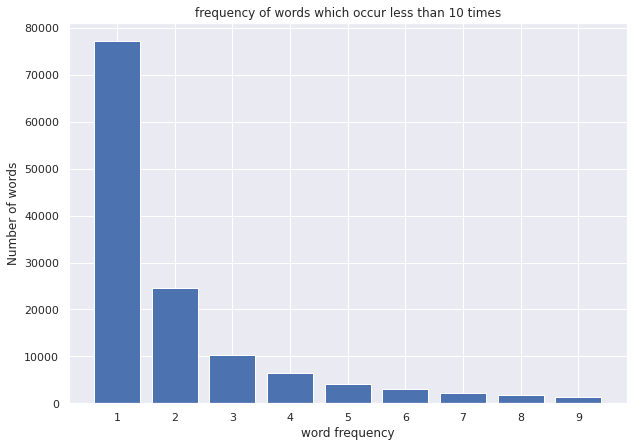

In [34]:
arr = np.array([j for j in lang['all'].values() if j < 10])
labels, counts = np.unique(arr, return_counts=True)
plt.figure(figsize=(10,7))
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.ylabel("Number of words")
plt.title("frequency of words which occur less than 10 times")
plt.xlabel("word frequency")
plt.show()

Let us have a look at the number of words that only appear once.

In [35]:
len([j for j in lang['all'].values() if j == 1]) # length function is used in this case

77259

Words that we think would appear once. Let's print out a few of these rare words

In [36]:
appear_once = [s for s, j in lang['all'].items() if j==1] 
pd.DataFrame (appear_once[:30], columns = ['rare words'])

rare words
0   ezingalindelekanga
1     ngobundlobongela
2             ukuvuzwa
3                yethi
4       ngembhalelwano
5         ezinkudlwana
6          esingenguwo
7          kuhlawulela
8              amadama
9           kudibanise
10             iyafika
11       akubonakalisi
12            ezalatha
13        kwaphicothwa
14     kunxityelelwane
15               nawes
16            awuqonde
17         eyinxalenye
18             kohambo
19              uxhasa
20           kutyholwa
21              enkolo
22         ekulindelwa
23           esilinani
24           athabatha
25       neekhompyutha
26   ngokwezicwangciso
27       esingamnikiyo
28   nangokungqinelana
29   nangawenzululwazi

In the above dataframe of rare words, some of these words dont make sence at all (for example, index 27). thus, before we remove them let us see the amount of data will be left with after the whole process.


In [37]:
print(len([j for j in lang['all'].values() if j >= 10])) # No. words that appear more than 10 times?
occurs_more_than_10_times = sum([j for j in lang['all'].values() if j >= 10]) 
print(occurs_more_than_10_times)

13223
959473


How many words of the total does that account for?

In [38]:
occurs_more_than_10_times/sum_words

0.7842092831087437

Using words that appear more than 10 times seems much more useful!, thus this accounts for 78% of all the words!

Now, let's remove all words that occur less than 10 times.

In [39]:
max_count = 10
remaining_word_index = [s for s, j in lang['all'].items() if j > max_count]

# **Exploratory Data Analysis (EDA)**

Here I will checking for the train data distribution across the different classes since this i catecorical data (it contains text).

In [40]:
# Let us observe datatypes in our dataset

train_df.dtypes

lang_id    object
text       object
tokens     object
stem       object
lemma      object
dtype: object

* Bar plot

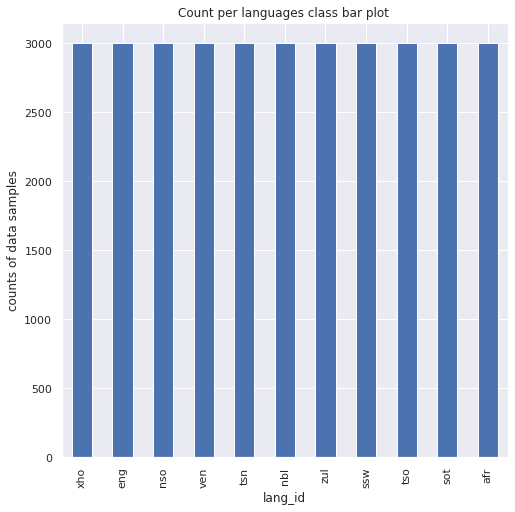

In [41]:
fig = plt.figure(figsize=(8, 8))
train_df['lang_id'].value_counts().plot(kind = 'bar')
plt.xlabel('lang_id')
plt.ylabel('counts of data samples')
plt.title('Count per languages class bar plot ')
plt.show()

From the output of the bar graph we can see that there is a clear no imbalance in the data sine all the classes are equal in magnitude.

Next we will separate the text based on their languages.

In [42]:
isiXhosa = train_df[train_df['lang_id']=='xho']
English = train_df[train_df['lang_id']=='eng']
Sepedi = train_df[train_df['lang_id']=='nso']
Tshivenda  = train_df[train_df['lang_id']=='ven']
Setswana = train_df[train_df['lang_id']=='tsn']
isiNdebele = train_df[train_df['lang_id']=='nbl']
isiZulu  = train_df[train_df['lang_id']=='zul']
siSwati  = train_df[train_df['lang_id']=='ssw']
Xitsonga = train_df[train_df['lang_id']=='tso']
Sesotho = train_df[train_df['lang_id']=='sot']
Afrikaans = train_df[train_df['lang_id']=='afr']

What are the most common words? What are the most common words by language? Answers to these questions will provide further insights 

In [43]:
words = train_df['lemma']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



convert list of lemma to sentences

In [44]:
train_df['lemma_str'] = [' '.join(map(str,l)) for l in train_df['lemma']]
train_df[['lemma_str']].head()

lemma_str
0  umgaqosiseko wenza amalungiselelo kumaziko axh...
1  idha iya kuba nobulumko bokubeka umsebenzi nap...
2  province kwazulunatal department transport inv...
3  netefatša gore ba file dilo ka moka tše le dum...
4  khomishini ya ndinganyiso ya mbeu yo ewa maana...

Let us explore 100 most commont word in the entire train dataframe 

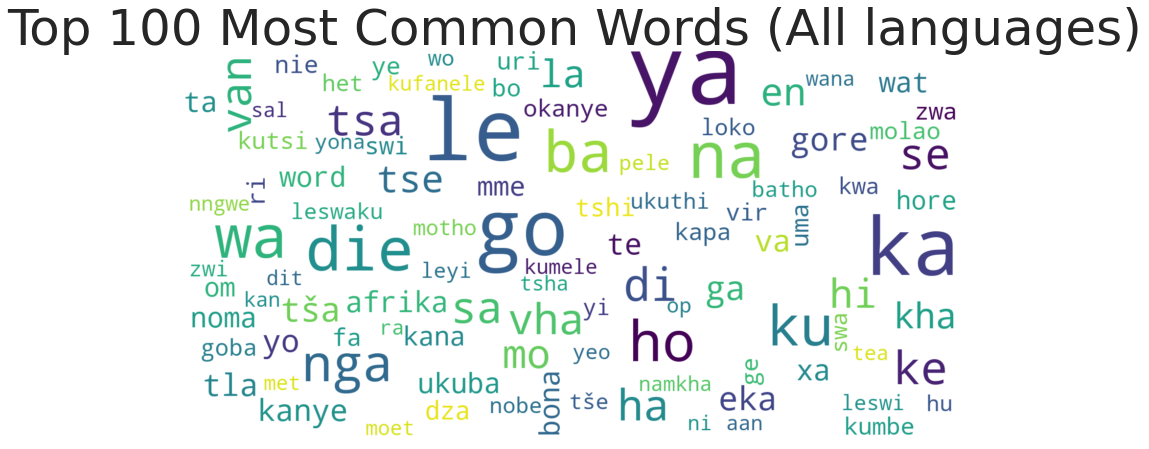

In [45]:
#This creates a list of single strings to generate the wordcloud.
df_words = pd.Series(train_df['lemma_str']).str.cat(sep=' ') 

wordcloud = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(df_words)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words (All languages)', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

**Let us explore 100 top common word for each languag

* isiZulu 100 top common words

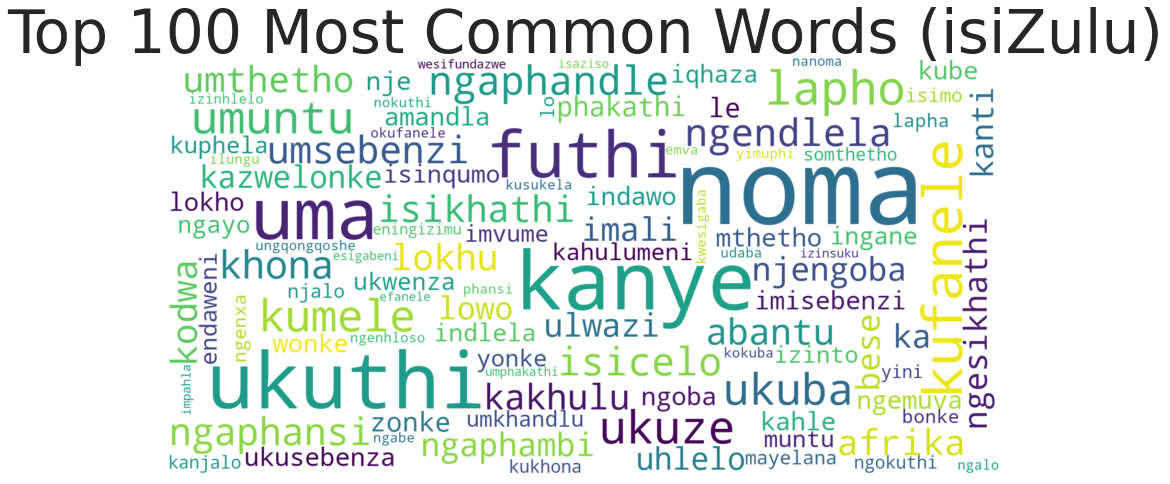

In [46]:
#This creates a list of single strings to generate the wordcloud.
isiZulu_wordcloud = pd.Series(isiZulu['text']).str.cat(sep=' ') 

wordcloud_1 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(isiZulu_wordcloud)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words (isiZulu)', fontsize=60)
plt.show()

* isiXhosa 100 top common words

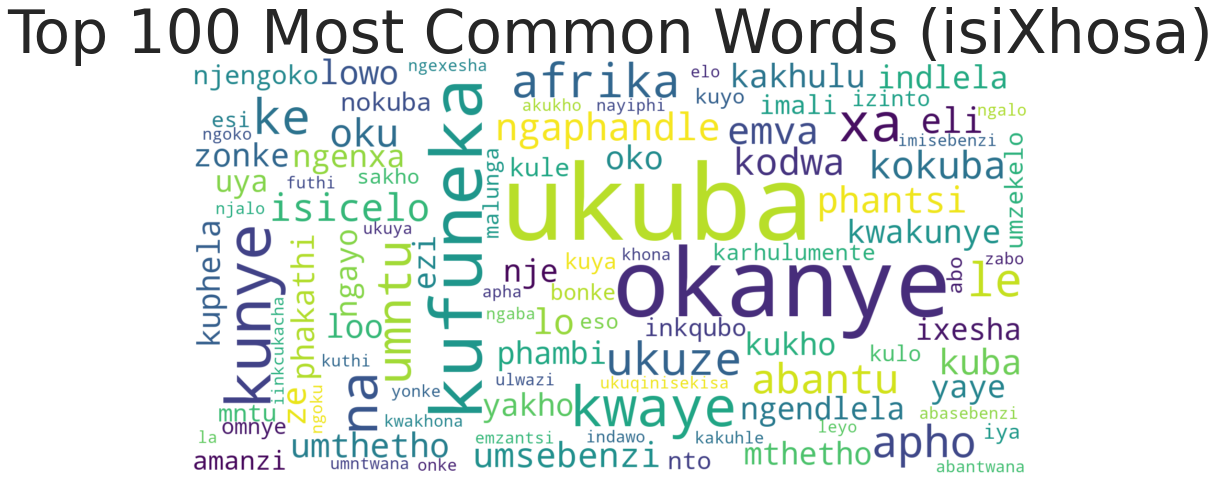

In [47]:
#This creates a list of single strings to generate the wordcloud.
isiXhosa_wordcloud = pd.Series(isiXhosa['text']).str.cat(sep=' ') 

wordcloud_2 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(isiXhosa_wordcloud)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words (isiXhosa)', fontsize=60)
plt.show()

* English 100 top common words

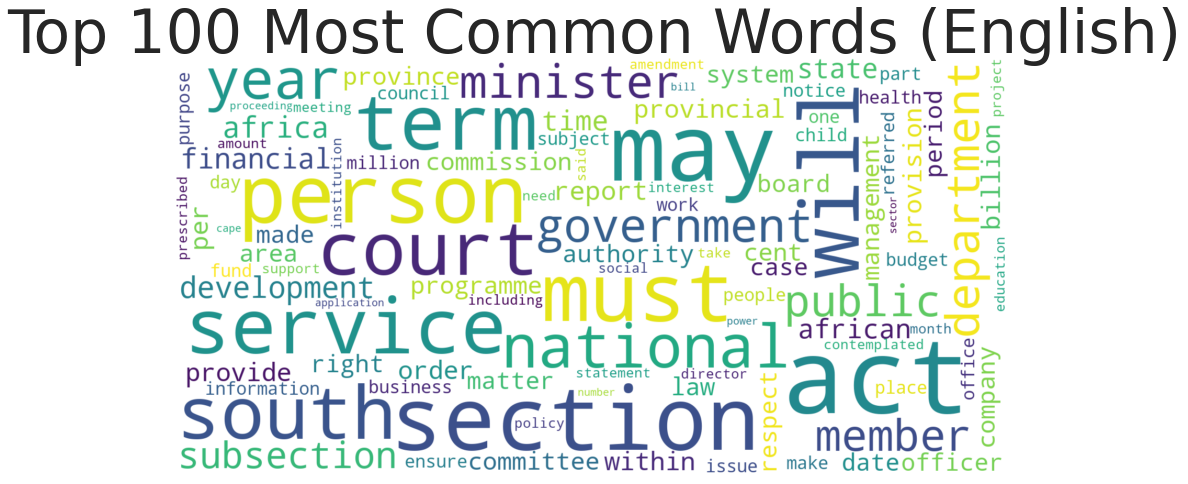

In [48]:
#This creates a list of single strings to generate the wordcloud.
English_wordcloud = pd.Series(English['text']).str.cat(sep=' ') 

wordcloud_3 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(English_wordcloud)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud_3, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words (English)', fontsize=60)
plt.show()

Sepedi 100 top common words

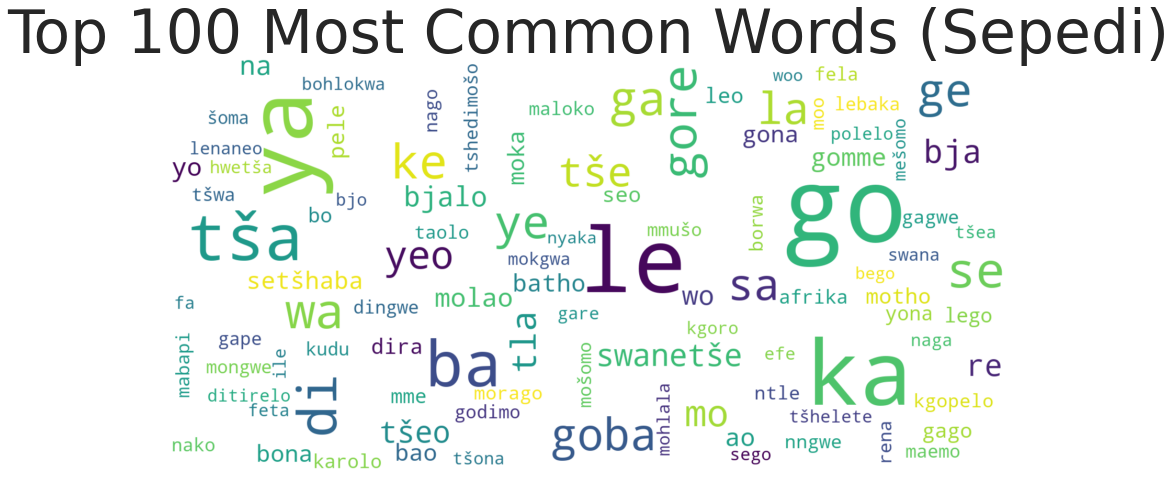

In [49]:
#This creates a list of single strings to generate the wordcloud.
Sepedi_wordcloud = pd.Series(Sepedi['text']).str.cat(sep=' ') 

wordcloud_4 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(Sepedi_wordcloud)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud_4, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words (Sepedi)', fontsize=60)
plt.show()

Tshivenda 100 top common words

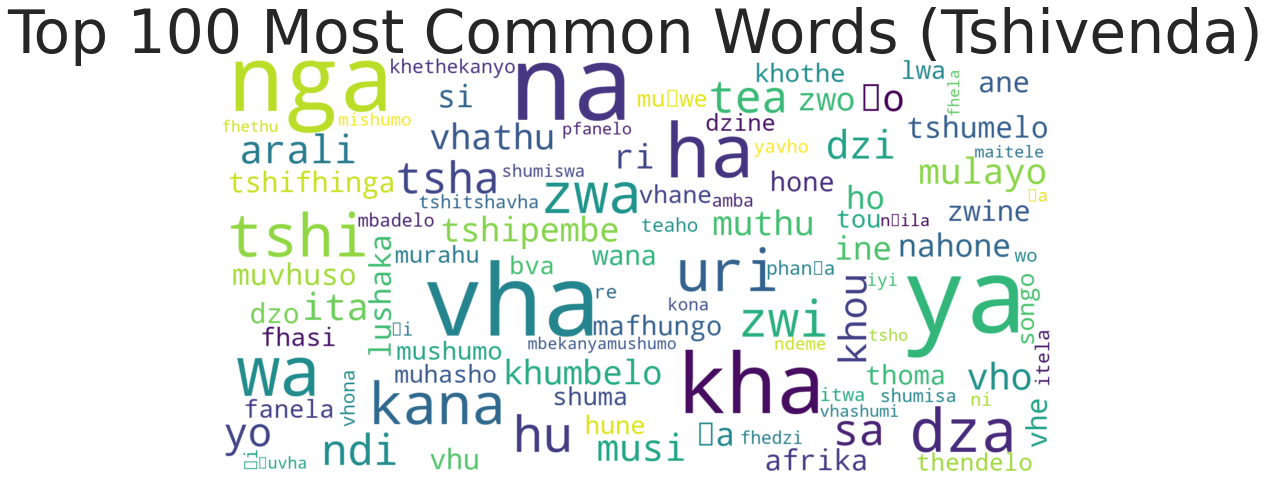

In [50]:
#This creates a list of single strings to generate the wordcloud.
Tshivenda_wordcloud = pd.Series(Tshivenda['text']).str.cat(sep=' ') 

wordcloud_5 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(Tshivenda_wordcloud)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud_5, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words (Tshivenda)', fontsize=60)
plt.show()

Setswana 100 top common words

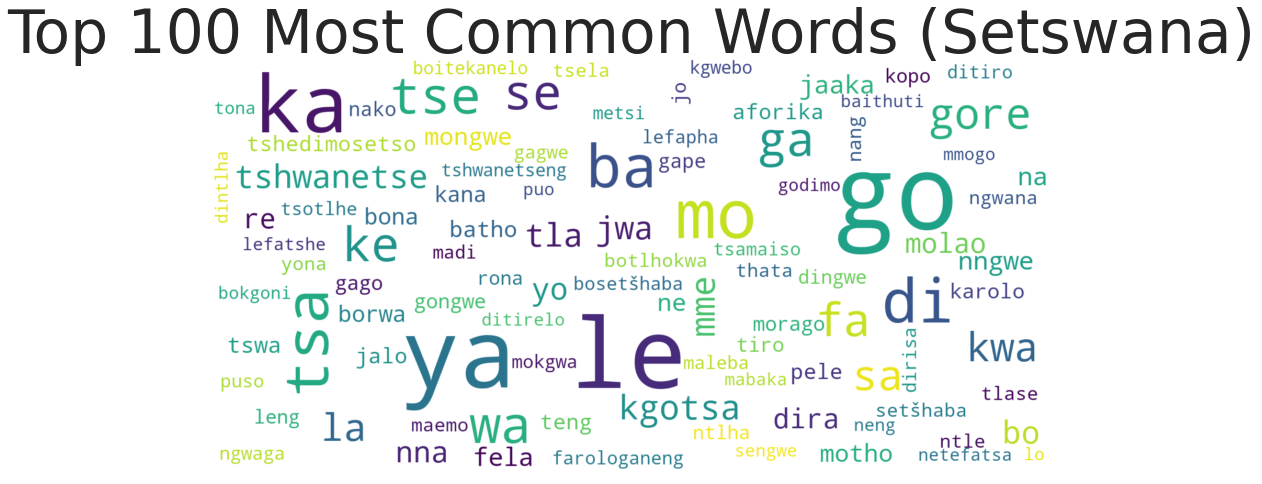

In [51]:
#This creates a list of single strings to generate the wordcloud.
Setswana_wordcloud = pd.Series(Setswana['text']).str.cat(sep=' ') 

wordcloud_6 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(Setswana_wordcloud)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud_6, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words (Setswana)', fontsize=60)
plt.show()

isiNdebele 100 top common words

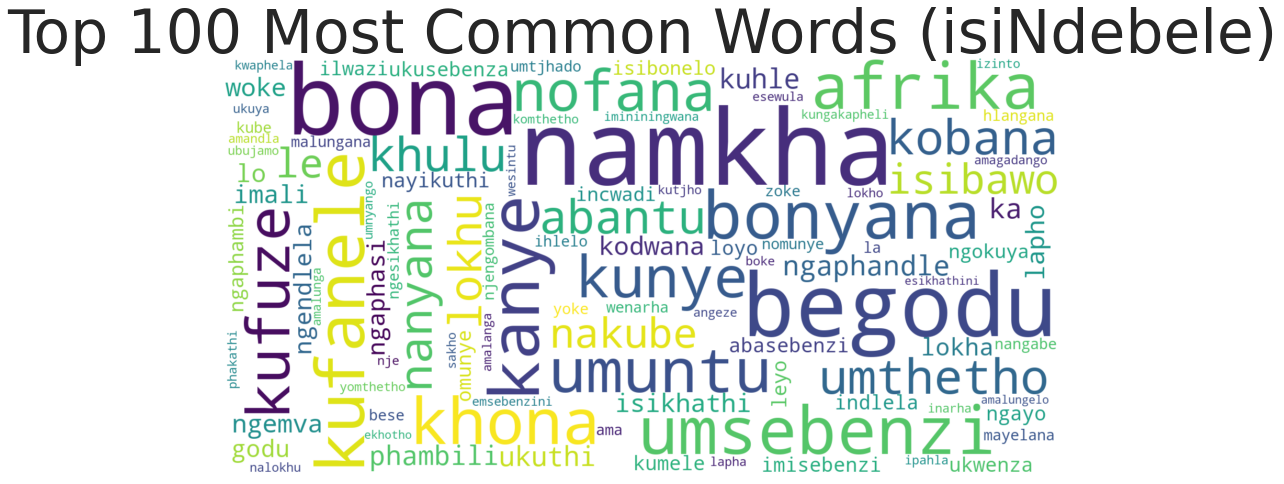

In [52]:
#This creates a list of single strings to generate the wordcloud.
isiNdebele_wordcloud = pd.Series(isiNdebele['text']).str.cat(sep=' ') 

wordcloud_7 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(isiNdebele_wordcloud)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud_7, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words (isiNdebele)', fontsize=60)
plt.show()

siSwati 100 top common words

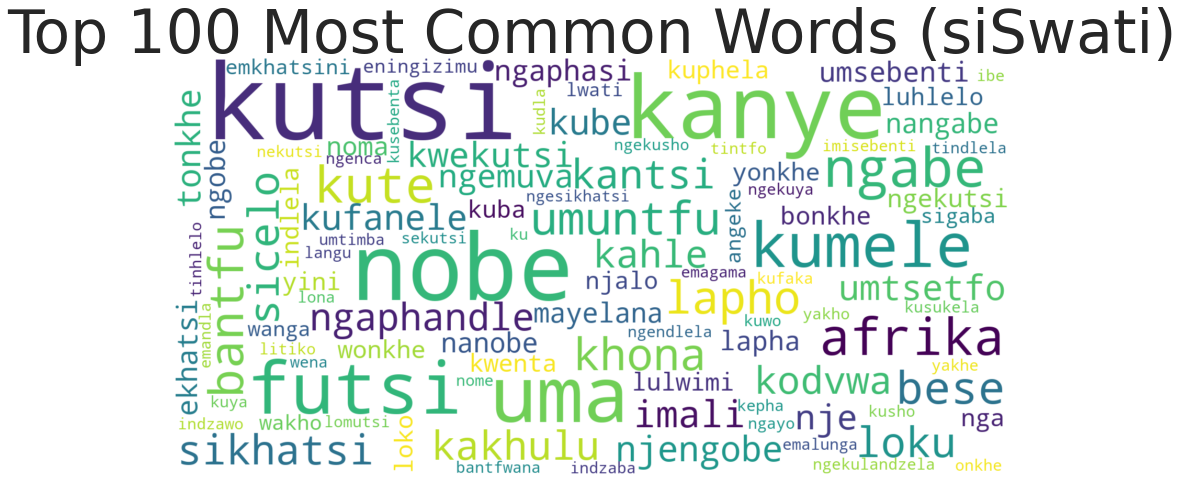

In [53]:
#This creates a list of single strings to generate the wordcloud.
siSwati_wordcloud = pd.Series(siSwati['text']).str.cat(sep=' ') 

wordcloud_8 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(siSwati_wordcloud)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud_8, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words (siSwati)', fontsize=60)
plt.show()

Xitsonga 100 top common words

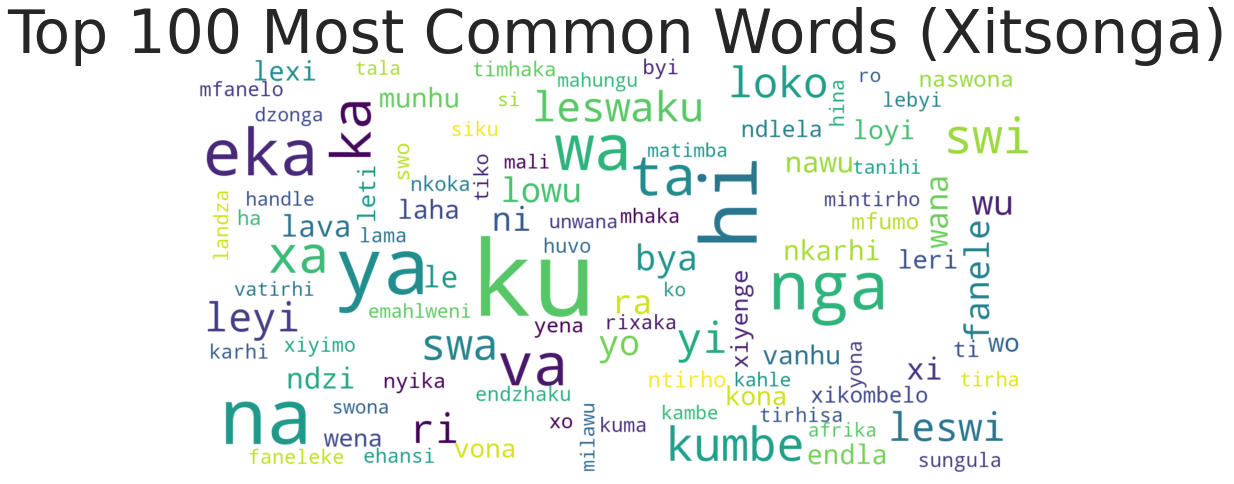

In [54]:
#This creates a list of single strings to generate the wordcloud.
Xitsonga_wordcloud = pd.Series(Xitsonga['text']).str.cat(sep=' ') 

wordcloud_9 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(Xitsonga_wordcloud)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud_9, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words (Xitsonga)', fontsize=60)
plt.show()

Sesotho 100 top common words

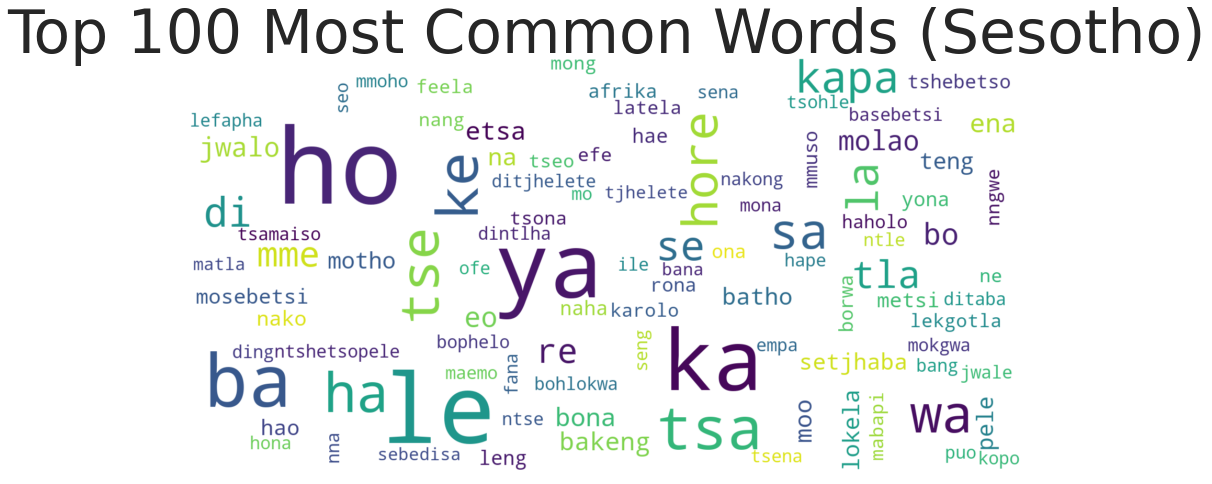

In [55]:
#This creates a list of single strings to generate the wordcloud.
Sesotho_wordcloud = pd.Series(Sesotho['text']).str.cat(sep=' ') 

wordcloud_10 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(Sesotho_wordcloud)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud_10, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words (Sesotho)', fontsize=60)
plt.show()

Afrikaans 100 top common words

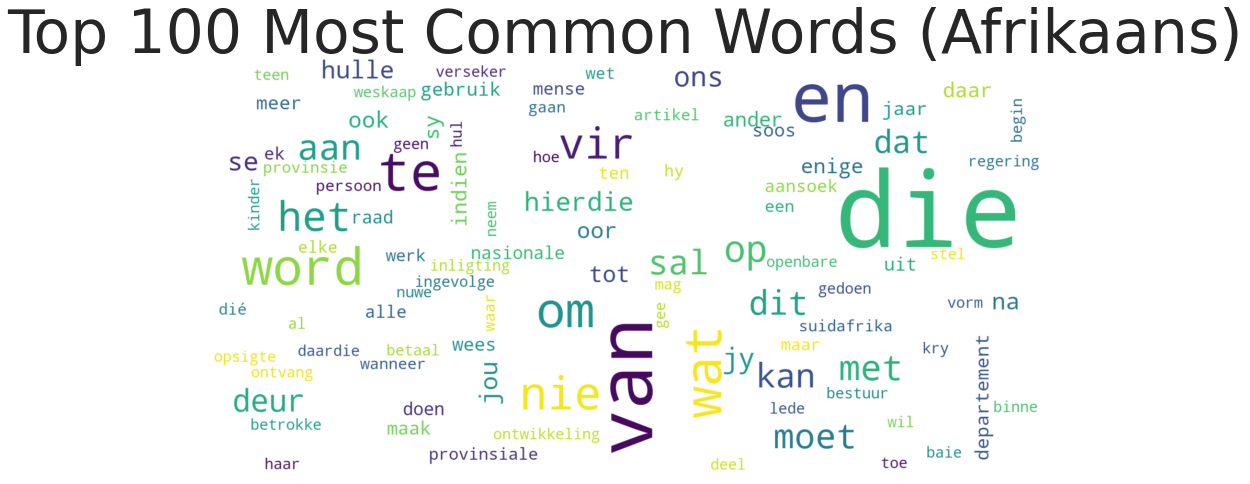

In [56]:
#This creates a list of single strings to generate the wordcloud.
Afrikaans_wordcloud = pd.Series(Afrikaans['text']).str.cat(sep=' ') 

wordcloud_11 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(Afrikaans_wordcloud)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud_11, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words (Afrikaans)', fontsize=60)
plt.show()

**ngrams**

ngrams are a method to extract combinations of words into features for model buildiing. The n in ngrams specifies the number of tokens to include. 

In [57]:
def word_grams(words, min_n=1, max_n=4):
  """ 
  this function takes in a list of words and returns a dictionary 
  with each word as a key, and the value represents the number of 
  times that word appeared
  """
  l = []
  for n in range(min_n, max_n):
    for ngram in ngrams(words, n):
      l.append(' '.join(str(i) for i in ngram))
  return l

2-gram returns all the consecutive pairs of words in a sentence, Let's explore the example using the defined above function

In [58]:
list1 = [x for x in ngrams(train_df['tokens'], 2)]

df = pd.DataFrame (list1)
print (df)

                                                       0  \
0      [umgaqosiseko, wenza, amalungiselelo, kumaziko...   
1      [idha, iya, kuba, nobulumko, bokubeka, umseben...   
2      [the, province, of, kwazulunatal, department, ...   
3      [o, netefatša, gore, o, ba, file, dilo, ka, mo...   
4      [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...   
...                                                  ...   
32994  [manuel, marin, s, illfated, debt, sources, bu...   
32995  [popo, ya, dipolateforomo, tse, ke, go, tlisa,...   
32996  [modise, mosadi, na, o, ntse, o, sa, utlwe, ho...   
32997  [closing, date, for, the, submission, of, comp...   
32998  [nawuphina, umntu, ofunyenwe, enetyala, phants...   

                                                       1  
0      [idha, iya, kuba, nobulumko, bokubeka, umseben...  
1      [the, province, of, kwazulunatal, department, ...  
2      [o, netefatša, gore, o, ba, file, dilo, ka, mo...  
3      [khomishini, ya, ndinganyiso, ya, mb

**CountVectorizer**

NLTK's CountVectorizer can be used to clean text data and extract features, transforming the text data into a matrix of numbers that can be fed into a machine learning model.

In [59]:
#First, we create the vectorizer object
vect = CountVectorizer()

In [60]:
vect.fit(train_df['text'])

CountVectorizer()

Tuning the vectorizer

Below are a few parameters that you can consider tuning 

*  stopwords

In [61]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

* ngram_range

In [62]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

* max_df: float in range [0.0, 1.0] or int, default=1.

In [63]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

* min_df: float in range [0.0, 1.0] or int, default=1

In [64]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

Now let's fit a tuned CountVectorizer to the train dataset.

In [65]:
betterVect = CountVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 1))

In [66]:
betterVect.fit(train_df['text'])

CountVectorizer(max_df=0.5, min_df=2, stop_words='english')

Before we can feed our data into our machine learning model, we need to first transform the text into numbers.

To do this task we can use Count Vectorization



# **Modelling**

In this section we will build multiple models in order to find the most accurate model, the accuracy of the model will be measured by the f1 score. Now to build the model we split the dataset into a train and test datasets(testing size=20% of the actual data and use random_state = 42).

The train dataset will be used to train a model and the test set will be used to test how accurate the model is in classifying unseen data.

In [67]:
y = train_df['lang_id']
X = train_df['lemma_str']

In [68]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

I will use the [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) method to convert the text data into numeric data. The TfIDF vectorizer reflects the importance of a word in the text as a numerical statistic. I will use max_features=10 000 so that our model is easier to train.

In [69]:
# extracting features
vectorizer = TfidfVectorizer(max_df=0.9, ngram_range=(1, 5), analyzer= 'char',max_features=10000)
X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_test_vect = vectorizer.transform(X_test).toarray()


# Scale data
scaler = preprocessing.MaxAbsScaler ()
X_train_scaled = scaler.fit_transform(X_train_vect)
X_test_scaled = scaler.transform(X_test_vect)

* logistic regression

**[Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 

**Training**

In [70]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train_vect,y_train)

LogisticRegression(multi_class='ovr')

**Prediction**

In [71]:
y_pred_1 = lr.predict(X_test_vect)

**Model Performance using the Classification Report**

In [72]:
print('Classification Report Linear logistics')
print(classification_report(y_test, y_pred_1))

Classification Report Linear logistics
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       0.99      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      1.00      1.00       609
         zul       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



* Random Forest 

**[Random Forest](https://en.wikipedia.org/wiki/Random_forest)** is a robust machine learning algorithm that can be used for a variety of tasks including regression and classification.

**Training**

In [73]:
Forest_model = RandomForestClassifier()
Forest_model.fit(X_train_vect,y_train)

RandomForestClassifier()

**Prediction**

In [74]:
y_pred_2 = Forest_model.predict(X_test_vect)

**Model Performance using the Classification Report**

In [75]:
print('Classification Report Random Forest')
print(classification_report(y_test, y_pred_2))

Classification Report Random Forest
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       1.00      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.98      0.99      0.98       609
         zul       0.98      0.98      0.98       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# **Feature Engineering in test dataset**

Before we can do feature engineering in test dataset, we need to ensure that our data is in a clean format that can actually be used. 

* Let us remove all websites and replaces them with the text 'web-url' if any in test dataset

In [76]:
test_df['text'] = test_df['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

* Convert to lower case

In [77]:
test_df['text'] = test_df['text'].str.lower() 
test_df[['text']].head() # Have a look at text column with all rows in lower case

text
0  mmasepala, fa maemo a a kgethegileng a letlele...
1  uzakwaziswa ngokufaneleko nakungafuneka eminye...
2         tshivhumbeo tshi fana na ngano dza vhathu.
3  kube inja nelikati betingevakala kutsi titsini...
4                      winste op buitelandse valuta.

* Remove digits and words containing digits

In [78]:
# To perfom this task, I will use lambda function.
test_df['text']=test_df['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

* Remove panctuation

In [79]:
# lets remove and view the data thus far
test_df['text'] = test_df['text'].apply(punctuation_removal)
test_df[['text']].head()

text
0  mmasepala fa maemo a a kgethegileng a letlelel...
1  uzakwaziswa ngokufaneleko nakungafuneka eminye...
2          tshivhumbeo tshi fana na ngano dza vhathu
3  kube inja nelikati betingevakala kutsi titsini...
4                       winste op buitelandse valuta

**Tokenization**

In [80]:
#word tokenize
tokenized_test_df = [word_tokenize(word) for word in test_df['text']]

In [81]:
# I will use TreebankWordTokenizer since it is much quicker than the word_tokenize function
test_df['tokens'] = test_df['text'].apply(tokeniser.tokenize)
test_df[['tokens']].head()

tokens
0  [mmasepala, fa, maemo, a, a, kgethegileng, a, ...
1  [uzakwaziswa, ngokufaneleko, nakungafuneka, em...
2  [tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]
3  [kube, inja, nelikati, betingevakala, kutsi, t...
4                  [winste, op, buitelandse, valuta]

**Normalization**

* Stemming

In [82]:
def test_df_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]
test_df['stem'] = test_df['tokens'].apply(test_df_stemmer, args=(stemmer, ))

In [83]:
# Now print what we have done so far using stemmer.
test_df[['tokens','stem']].head()

tokens  \
0  [mmasepala, fa, maemo, a, a, kgethegileng, a, ...   
1  [uzakwaziswa, ngokufaneleko, nakungafuneka, em...   
2  [tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]   
3  [kube, inja, nelikati, betingevakala, kutsi, t...   
4                  [winste, op, buitelandse, valuta]   

                                                stem  
0  [mmasepala, fa, maemo, a, a, kgethegileng, a, ...  
1  [uzakwaziswa, ngokufaneleko, nakungafuneka, em...  
2  [tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]  
3  [kube, inja, nelikati, betingevakala, kutsi, t...  
4                    [winst, op, buitelands, valuta]

* Lemmatization

Let us lemmatize all of the words in the test dataframe.

In [84]:
def test_df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

test_df['lemma'] = test_df['tokens'].apply(test_df_lemma, args=(lemmatizer, ))

In [85]:
# Now see what we have done so far using lemmatizer.
test_df[['tokens','lemma']].head()

tokens  \
0  [mmasepala, fa, maemo, a, a, kgethegileng, a, ...   
1  [uzakwaziswa, ngokufaneleko, nakungafuneka, em...   
2  [tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]   
3  [kube, inja, nelikati, betingevakala, kutsi, t...   
4                  [winste, op, buitelandse, valuta]   

                                               lemma  
0  [mmasepala, fa, maemo, a, a, kgethegileng, a, ...  
1  [uzakwaziswa, ngokufaneleko, nakungafuneka, em...  
2  [tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]  
3  [kube, inja, nelikati, betingevakala, kutsi, t...  
4                  [winste, op, buitelandse, valuta]

Convert lemma to sentenses

In [86]:
test_df['lemma_str'] = [' '.join(map(str,l)) for l in test_df['lemma']]
test_df[['lemma_str']].head()

lemma_str
0  mmasepala fa maemo a a kgethegileng a letlelel...
1  uzakwaziswa ngokufaneleko nakungafuneka eminye...
2          tshivhumbeo tshi fana na ngano dza vhathu
3  kube inja nelikati betingevakala kutsi titsini...
4                       winste op buitelandse valuta

# **Submission**

In [87]:
# Transform data to correct vectorizer
X_fin = vectorizer.transform(test_df.lemma_str).toarray() 

In [88]:
y_pred_test = lr.predict(X_fin)

In [89]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      5682 non-null   int64 
 1   text       5682 non-null   object
 2   tokens     5682 non-null   object
 3   stem       5682 non-null   object
 4   lemma      5682 non-null   object
 5   lemma_str  5682 non-null   object
dtypes: int64(1), object(5)
memory usage: 266.5+ KB


In [90]:
submission = test_df[['index']]

In [91]:
submission['lang_id']=y_pred_test

In [92]:
submission

index lang_id
0         1     tsn
1         2     nbl
2         3     ven
3         4     ssw
4         5     afr
...     ...     ...
5677   5678     eng
5678   5679     nso
5679   5680     sot
5680   5681     sot
5681   5682     nbl

[5682 rows x 2 columns]

In [93]:
submission.to_csv('submission.csv', index=False)